In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

import json

with open("../data/labeled_data_2.json", "r") as json_file:
    data = json.load(json_file)

In [27]:
labels = np.array([entry['score'] for entry in data.values()])
features = np.array([np.array(list({k : v for k, v in entry.items() if k != 'score'}.values())) for entry in data.values()])

print(labels.shape)
print(features.shape)


print(np.mean(labels))

labels = (labels >= 5).astype(int)

(128,)
(128, 140)
4.5140625


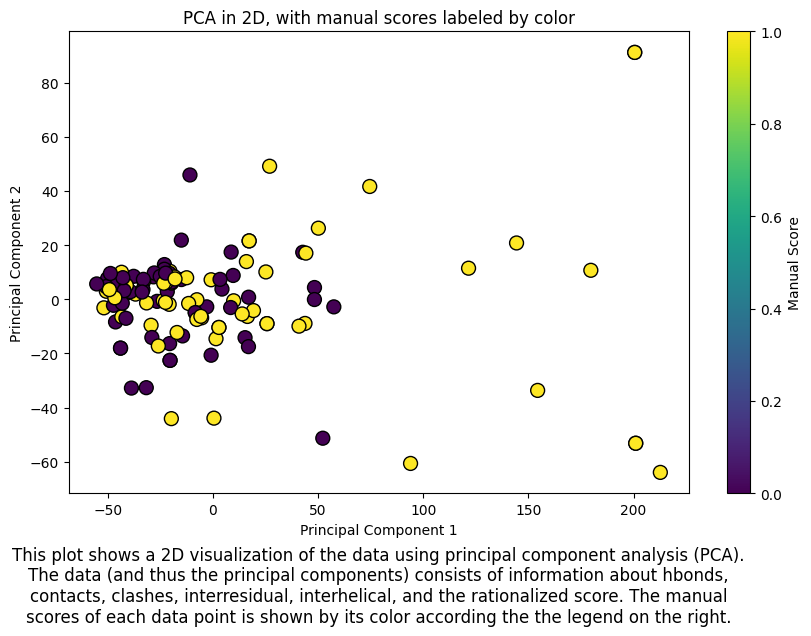

In [29]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features)

plt.figure(figsize=(10, 6))

scatter = plt.scatter(
    principal_components[:, 0],
    principal_components[:, 1],
    c=labels,  
    cmap=plt.get_cmap('viridis'),  
    marker='o',  
    edgecolors='k',  
    s=100  #
)
cbar = plt.colorbar(scatter)
cbar.set_label('Manual Score')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA in 2D, with manual scores labeled by color')

caption = "This plot shows a 2D visualization of the data using principal component analysis (PCA).\nThe data (and thus the principal components) consists of information about hbonds,\ncontacts, clashes, interresidual, interhelical, and the rationalized score. The manual\nscores of each data point is shown by its color according the the legend on the right."
plt.text(0.5, -0.2, caption, ha='center', va='center', transform=plt.gca().transAxes, fontsize=12)

plt.show()

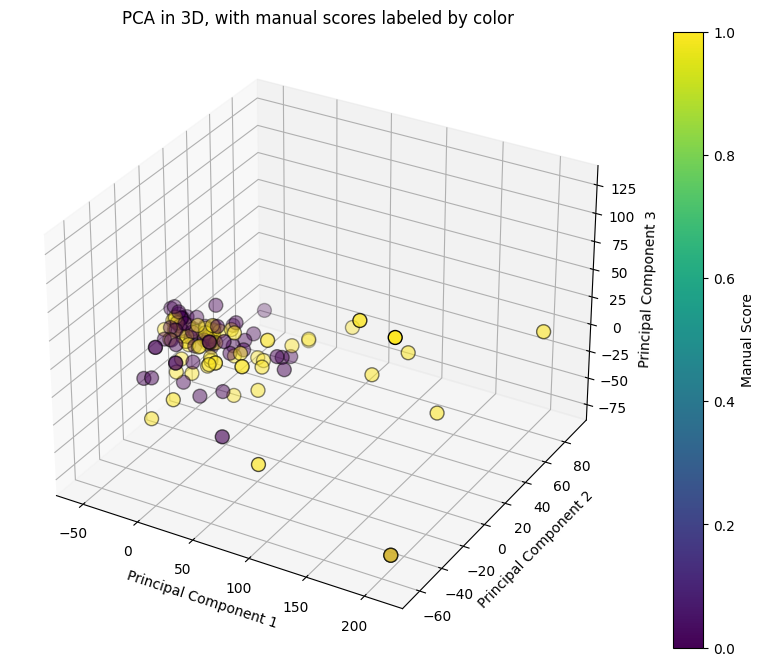

In [30]:
pca = PCA(n_components=3)
principal_components = pca.fit_transform(features)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    principal_components[:, 0],
    principal_components[:, 1],
    principal_components[:, 2],
    c=labels, 
    cmap=plt.get_cmap('viridis'), 
    marker='o', 
    edgecolors='k', 
    s=100 
)
cbar = plt.colorbar(scatter)
cbar.set_label('Manual Score')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('PCA in 3D, with manual scores labeled by color')
plt.show()

/var/folders/cq/hccfycv578lbwg2n8xqc62s00000gn/T/ipykernel_10089/1015082742.py:22: RuntimeWarning: invalid value encountered in sqrt
  singular_values = np.sqrt(eigenvalues)


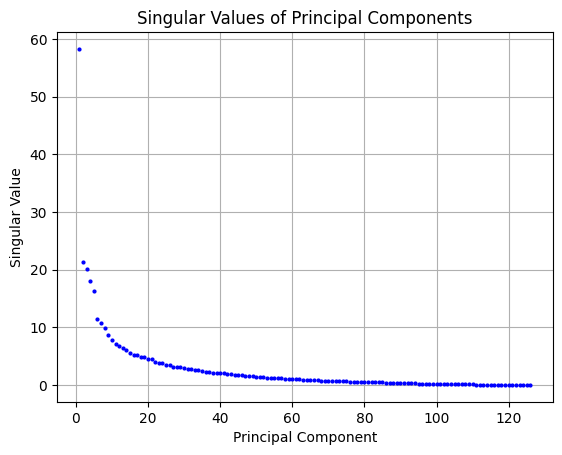

In [31]:
with open("../data/labeled_data_2.json", "r") as json_file:
    data = json.load(json_file)

y = np.array([entry['score'] for entry in data.values()])
X = np.array([np.array(list({k : v for k, v in entry.items() if k != 'score'}.values())) for entry in data.values()])

mean = np.mean(X, axis=0)
X_centered = X - mean

# Compute the covariance matrix
cov_matrix = np.cov(X_centered, rowvar=False)

# Perform eigenvalue decomposition on the covariance matrix
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Compute the singular values from eigenvalues
singular_values = np.sqrt(eigenvalues)

# Create a dot plot for singular values
plt.figure()
plt.plot(range(1, len(singular_values) + 1), singular_values, marker='o', linestyle='-', color='b', markersize=2, linewidth=0)
plt.xlabel('Principal Component')
plt.ylabel('Singular Value')
plt.title('Singular Values of Principal Components')
plt.grid(True)

# Show the plot
plt.show()